# Análisis Exploratorio de Datos (EDA)

## Dataset 2: Smart Lighting - Predicción de Consumo Energético
<br>

**Objetivo:** Explorar y analizar el dataset de iluminación inteligente para prepararlo para un modelo de predicción de consumo energético.

**Dataset:** Smart Lighting Dataset 2024

**Fuente:** Kaggle


## 1. Importar las librerías necesarias

In [2]:
# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


## 2. Cargar el dataset

In [3]:
# Cargar el dataset
df = pd.read_csv('../data/smart_lighting_dataset_2024.csv')

# Convertir timestamp a datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Mostrar las primeras filas
print("Primeras 5 filas del dataset:")
df.head()

Primeras 5 filas del dataset:


,timestamp,zone_id,ambient_light_lux,motion_detected,temperature_celsius,occupancy_count,day_of_week,time_of_day,weather_condition,special_event_flag,energy_price_per_kwh,prev_hour_energy_usage_kwh,traffic_density,avg_pedestrian_speed,adjusted_light_intensity,energy_consumption_kwh,lighting_action_class
0,2024-01-01 00:00:00,3,0.00,0,22.08,7,Monday,Night,Cloudy,0,3.83,3.27,26.0,4.54,54.40,1.144,0
1,2024-01-01 00:43:00,3,35.78,0,19.19,6,Monday,Night,Cloudy,0,4.61,1.50,18.9,2.42,89.75,2.069,1
2,2024-01-01 01:27:00,7,0.00,0,27.78,9,Monday,Night,Clear,0,4.21,2.51,27.6,2.85,82.25,1.687,1
3,2024-01-01 02:11:00,2,0.00,1,33.11,16,Monday,Night,Foggy,0,6.16,0.34,23.1,2.45,72.57,1.631,1
4,2024-01-01 02:55:00,4,0.00,1,27.07,11,Monday,Night,Clear,0,5.72,1.52,26.4,3.49,78.79,1.737,1


## 3. Inspección inicial del dataset

### 3.1 Dimensiones y estructura

In [4]:
# Dimensiones del dataset
print(f"Dimensiones del dataset: {df.shape}")
print(f"  - Número de filas: {df.shape[0]:,}")
print(f"  - Número de columnas: {df.shape[1]}")

Dimensiones del dataset: (12000, 17)
  - Número de filas: 12,000
  - Número de columnas: 17


In [5]:
# Información general del dataset
print("\nInformación general del dataset:")
df.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   timestamp                   12000 non-null  datetime64[ns]
 1   zone_id                     12000 non-null  int64         
 2   ambient_light_lux           12000 non-null  float64       
 3   motion_detected             12000 non-null  int64         
 4   temperature_celsius         12000 non-null  float64       
 5   occupancy_count             12000 non-null  int64         
 6   day_of_week                 12000 non-null  object        
 7   time_of_day                 12000 non-null  object        
 8   weather_condition           12000 non-null  object        
 9   special_event_flag          12000 non-null  int64         
 10  energy_price_per_kwh        12000 non-null  float64       
 11  prev_hour_energy_usa

estos objetos los podemos transformar a valores númericos
- dia de la semana
- hora del día
- condición del clima

In [6]:
# Nombres de las columnas
print("\nColumnas del dataset:")
print(df.columns.tolist())


Columnas del dataset:
['timestamp', 'zone_id', 'ambient_light_lux', 'motion_detected', 'temperature_celsius', 'occupancy_count', 'day_of_week', 'time_of_day', 'weather_condition', 'special_event_flag', 'energy_price_per_kwh', 'prev_hour_energy_usage_kwh', 'traffic_density', 'avg_pedestrian_speed', 'adjusted_light_intensity', 'energy_consumption_kwh', 'lighting_action_class']


### 3.2 Tipos de datos

In [7]:
# Tipos de datos de cada columna
print("Tipos de datos:")
print(df.dtypes)

# Separar columnas por tipo
numericas = df.select_dtypes(include=[np.number]).columns.tolist()
categoricas = df.select_dtypes(include=['object']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

print(f"\nColumnas numéricas ({len(numericas)}): {numericas}")
print(f"\nColumnas categóricas ({len(categoricas)}): {categoricas}")
print(f"\nColumnas datetime ({len(datetime_cols)}): {datetime_cols}")

Tipos de datos:
timestamp                     datetime64[ns]
zone_id                                int64
ambient_light_lux                    float64
motion_detected                        int64
temperature_celsius                  float64
occupancy_count                        int64
day_of_week                           object
time_of_day                           object
weather_condition                     object
special_event_flag                     int64
energy_price_per_kwh                 float64
prev_hour_energy_usage_kwh           float64
traffic_density                      float64
avg_pedestrian_speed                 float64
adjusted_light_intensity             float64
energy_consumption_kwh               float64
lighting_action_class                  int64
dtype: object

Columnas numéricas (13): ['zone_id', 'ambient_light_lux', 'motion_detected', 'temperature_celsius', 'occupancy_count', 'special_event_flag', 'energy_price_per_kwh', 'prev_hour_energy_usage_kwh', 'traffic_

### 3.3 Rango temporal del dataset

In [8]:
# Análisis temporal
print("Análisis temporal:")
print(f"  - Fecha inicial: {df['timestamp'].min()}")
print(f"  - Fecha final: {df['timestamp'].max()}")
print(f"  - Días cubiertos: {(df['timestamp'].max() - df['timestamp'].min()).days}")
print(f"  - Frecuencia promedio entre registros: {(df['timestamp'].max() - df['timestamp'].min()) / len(df)}")

Análisis temporal:
  - Fecha inicial: 2024-01-01 00:00:00
  - Fecha final: 2024-12-31 00:00:00
  - Días cubiertos: 365
  - Frecuencia promedio entre registros: 0 days 00:43:48


## 4. Análisis de Valores Faltantes

In [52]:
# Contar valores faltantes por columna
print("Valores faltantes por columna:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Valores_Faltantes': missing,
    'Porcentaje': missing_pct
})

# Mostrar todas las columnas
print(missing_df)

if missing.sum() == 0:
    print("\n No hay valores faltantes en el dataset.")

Valores faltantes por columna:
                            Valores_Faltantes  Porcentaje
timestamp                                   0         0.0
zone_id                                     0         0.0
ambient_light_lux                           0         0.0
motion_detected                             0         0.0
temperature_celsius                         0         0.0
occupancy_count                             0         0.0
day_of_week                                 0         0.0
time_of_day                                 0         0.0
weather_condition                           0         0.0
special_event_flag                          0         0.0
energy_price_per_kwh                        0         0.0
prev_hour_energy_usage_kwh                  0         0.0
traffic_density                             0         0.0
avg_pedestrian_speed                        0         0.0
adjusted_light_intensity                    0         0.0
energy_consumption_kwh                   

## 5. Estadísticas Descriptivas

### 5.1 Variables numéricas

In [53]:
# Estadísticas descriptivas de variables numéricas
print("Estadísticas descriptivas (variables numéricas):")
df.describe()

Estadísticas descriptivas (variables numéricas):


,timestamp,zone_id,ambient_light_lux,motion_detected,temperature_celsius,occupancy_count,special_event_flag,energy_price_per_kwh,prev_hour_energy_usage_kwh,traffic_density,avg_pedestrian_speed,adjusted_light_intensity,energy_consumption_kwh,lighting_action_class,year,month,day,hour,dayofweek
count,12000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.0,12000.000000,12000.000000,12000.000000,12000.000000
mean,2024-07-01 11:59:30.005000192,6.53425,3708.629288,0.284083,24.964517,8.557167,0.008583,5.034449,2.545444,22.048175,2.929889,68.204271,1.483592,0.743583,2024.0,6.498583,15.716583,11.498083,2.992583
min,2024-01-01 00:00:00,1.00000,0.000000,0.000000,-15.870000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.720000,0.000000,0.000000,2024.0,1.000000,1.000000,0.000000,0.000000
25%,2024-04-01 05:59:15,4.00000,55.565000,0.000000,20.970000,5.000000,0.000000,4.000000,1.090000,14.600000,2.250000,47.345000,1.047000,0.000000,2024.0,4.000000,8.000000,5.000000,1.000000
50%,2024-07-01 11:59:30,7.00000,2031.855000,0.000000,24.970000,7.000000,0.000000,5.010000,2.430000,21.500000,2.930000,76.690000,1.595000,1.000000,2024.0,7.000000,16.000000,11.000000,3.000000
75%,2024-09-30 17:59:45,10.00000,7011.792500,1.000000,29.082500,11.000000,0.000000,5.990000,3.800000,28.800000,3.610000,86.650000,1.907000,1.000000,2024.0,9.000000,23.000000,17.000000,5.000000
max,2024-12-31 00:00:00,12.00000,105403.500000,1.000000,64.860000,230.000000,1.000000,8.910000,11.120000,67.100000,6.000000,100.000000,2.887000,2.000000,2024.0,12.000000,31.000000,23.000000,6.000000
std,NaN,3.48035,4656.283063,0.450996,6.260797,8.273770,0.092252,1.272504,1.811987,10.585009,1.014598,22.314649,0.538188,0.585829,0.0,3.444390,8.788280,6.922475,2.003088


In [11]:
# Estadísticas adicionales
print("\nMedianas:")
print(df.select_dtypes(include=[np.number]).median())

print("\nModa:")
print(df.select_dtypes(include=[np.number]).mode().iloc[0])


Medianas:
zone_id                          7.000
ambient_light_lux             2031.855
motion_detected                  0.000
temperature_celsius             24.970
occupancy_count                  7.000
special_event_flag               0.000
energy_price_per_kwh             5.010
prev_hour_energy_usage_kwh       2.430
traffic_density                 21.500
avg_pedestrian_speed             2.930
adjusted_light_intensity        76.690
energy_consumption_kwh           1.595
lighting_action_class            1.000
dtype: float64

Moda:
zone_id                        12.000
ambient_light_lux               0.000
motion_detected                 0.000
temperature_celsius            24.630
occupancy_count                 5.000
special_event_flag              0.000
energy_price_per_kwh            3.000
prev_hour_energy_usage_kwh      0.000
traffic_density                 0.000
avg_pedestrian_speed            2.910
adjusted_light_intensity      100.000
energy_consumption_kwh          1.743
ligh

### 5.2 Variables categóricas

In [54]:
# Analizar variables categóricas
print("Análisis de variables categóricas:")
for col in categoricas:
    print(f"\n")
    print(f"Columna: {col}")
    print(f"\n")
    print(f"Valores únicos: {df[col].nunique()}")
    print(f"\nDistribución:")
    print(df[col].value_counts())
    print(f"\nPorcentajes:")
    print(df[col].value_counts(normalize=True) * 100)

Análisis de variables categóricas:


Columna: day_of_week


Valores únicos: 7

Distribución:
day_of_week
Monday       1739
Tuesday      1711
Wednesday    1710
Thursday     1710
Friday       1710
Saturday     1710
Sunday       1710
Name: count, dtype: int64

Porcentajes:
day_of_week
Monday       14.491667
Tuesday      14.258333
Wednesday    14.250000
Thursday     14.250000
Friday       14.250000
Saturday     14.250000
Sunday       14.250000
Name: proportion, dtype: float64


Columna: time_of_day


Valores únicos: 4

Distribución:
time_of_day
Night        4500
Morning      3000
Afternoon    2500
Evening      2000
Name: count, dtype: int64

Porcentajes:
time_of_day
Night        37.500000
Morning      25.000000
Afternoon    20.833333
Evening      16.666667
Name: proportion, dtype: float64


Columna: weather_condition


Valores únicos: 4

Distribución:
weather_condition
Clear     7197
Cloudy    2400
Rainy     1764
Foggy      639
Name: count, dtype: int64

Porcentajes:
weather_condition
Clea

día de la semana y el clima los podemos transformar a números
- día de la semana 1-7
- hora del día 1-4
- clima 1-4

## 6. Análisis de la Variable Objetivo

In [55]:
# Análisis de energy_consumption_kwh (variable continua)
print("Estadísticas de energy_consumption_kwh:")
print(f"Media: {df['energy_consumption_kwh'].mean():.3f} kWh")
print(f"Mediana: {df['energy_consumption_kwh'].median():.3f} kWh")
print(f"Moda: {df['energy_consumption_kwh'].mode()[0]:.3f} kWh")
print(f"Desviación estándar: {df['energy_consumption_kwh'].std():.3f} kWh")
print(f"Varianza: {df['energy_consumption_kwh'].var():.3f}")
print(f"\nRango:")
print(f"  - Mínimo: {df['energy_consumption_kwh'].min():.3f} kWh")
print(f"  - Máximo: {df['energy_consumption_kwh'].max():.3f} kWh")
print(f"  - Rango: {df['energy_consumption_kwh'].max() - df['energy_consumption_kwh'].min():.3f} kWh")
print(f"\nCuartiles:")
print(f"  - Q1 (25%): {df['energy_consumption_kwh'].quantile(0.25):.3f} kWh")
print(f"  - Q2 (50%): {df['energy_consumption_kwh'].quantile(0.50):.3f} kWh")
print(f"  - Q3 (75%): {df['energy_consumption_kwh'].quantile(0.75):.3f} kWh")
print(f"  - IQR: {df['energy_consumption_kwh'].quantile(0.75) - df['energy_consumption_kwh'].quantile(0.25):.3f} kWh")
print(f"\nAsimetría (Skewness): {df['energy_consumption_kwh'].skew():.3f}")
print(f"Curtosis (Kurtosis): {df['energy_consumption_kwh'].kurtosis():.3f}")

Estadísticas de energy_consumption_kwh:
Media: 1.484 kWh
Mediana: 1.595 kWh
Moda: 1.743 kWh
Desviación estándar: 0.538 kWh
Varianza: 0.290

Rango:
  - Mínimo: 0.000 kWh
  - Máximo: 2.887 kWh
  - Rango: 2.887 kWh

Cuartiles:
  - Q1 (25%): 1.047 kWh
  - Q2 (50%): 1.595 kWh
  - Q3 (75%): 1.907 kWh
  - IQR: 0.860 kWh

Asimetría (Skewness): -0.355
Curtosis (Kurtosis): -0.752


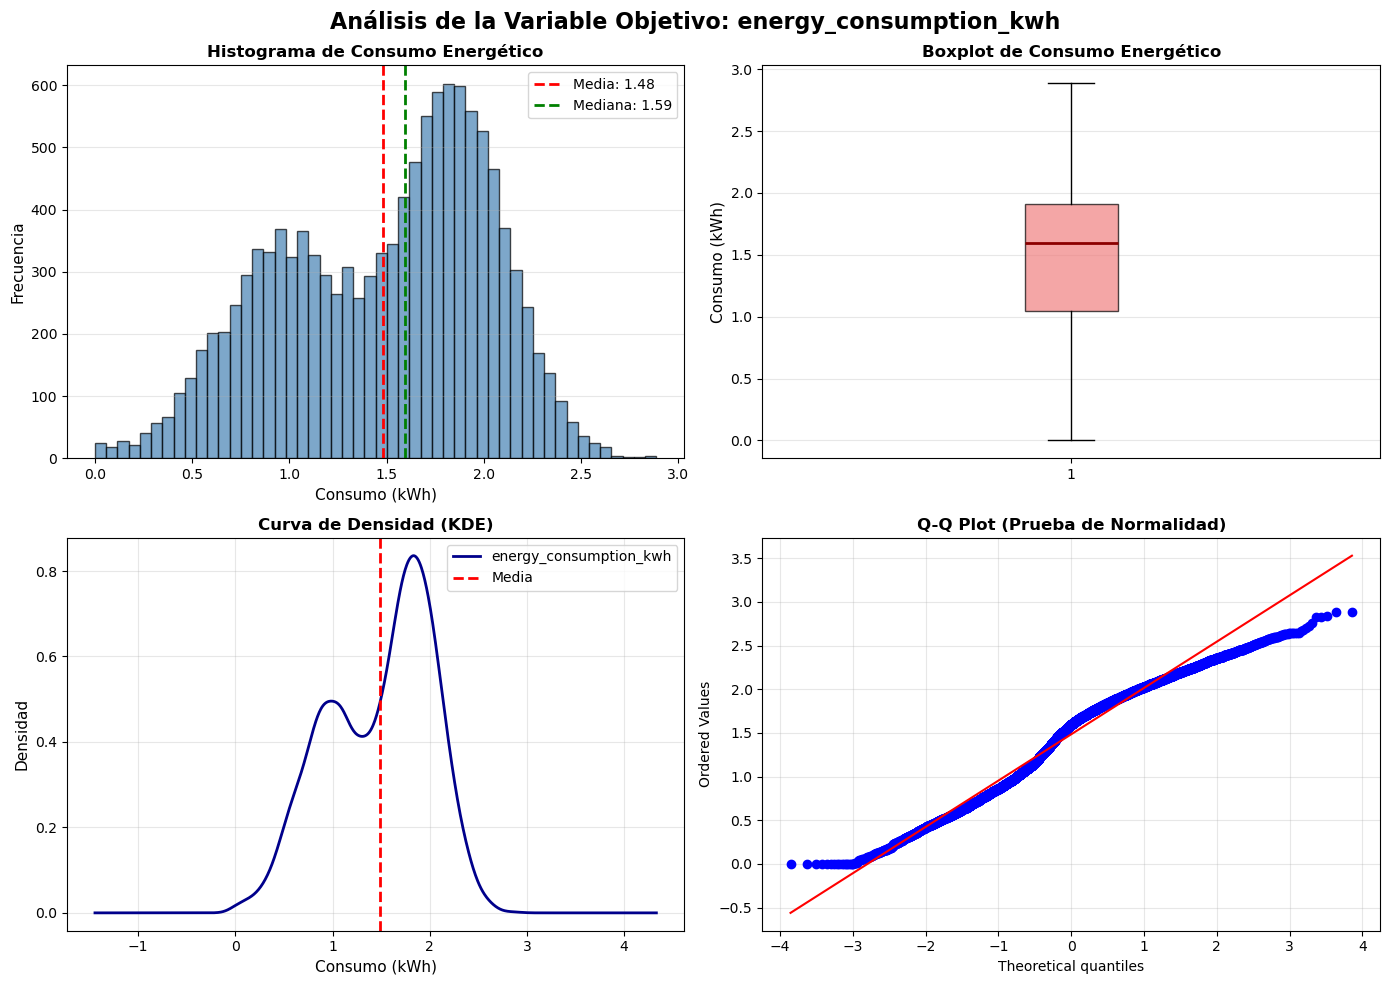

In [56]:
# Visualizar distribución de energy_consumption_kwh
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Análisis de la Variable Objetivo: energy_consumption_kwh', fontsize=16, fontweight='bold')
# Histograma
axes[0, 0].hist(df['energy_consumption_kwh'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_title('Histograma de Consumo Energético', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Consumo (kWh)', fontsize=11)
axes[0, 0].set_ylabel('Frecuencia', fontsize=11)
axes[0, 0].axvline(df['energy_consumption_kwh'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f"Media: {df['energy_consumption_kwh'].mean():.2f}")
axes[0, 0].axvline(df['energy_consumption_kwh'].median(), color='green', linestyle='--', 
                   linewidth=2, label=f"Mediana: {df['energy_consumption_kwh'].median():.2f}")
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Boxplot
axes[0, 1].boxplot(df['energy_consumption_kwh'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightcoral', alpha=0.7),
                   medianprops=dict(color='darkred', linewidth=2))
axes[0, 1].set_title('Boxplot de Consumo Energético', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Consumo (kWh)', fontsize=11)
axes[0, 1].grid(axis='y', alpha=0.3)

# KDE (curva de densidad)
df['energy_consumption_kwh'].plot(kind='kde', ax=axes[1, 0], color='darkblue', linewidth=2)
axes[1, 0].set_title('Curva de Densidad (KDE)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Consumo (kWh)', fontsize=11)
axes[1, 0].set_ylabel('Densidad', fontsize=11)
axes[1, 0].axvline(df['energy_consumption_kwh'].mean(), color='red', linestyle='--', 
                   linewidth=2, label='Media')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Q-Q Plot para normalidad
from scipy import stats
stats.probplot(df['energy_consumption_kwh'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Prueba de Normalidad)', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


## 7. Visualización de Datos Univariables

### 7.1 Histogramas de variables numéricas

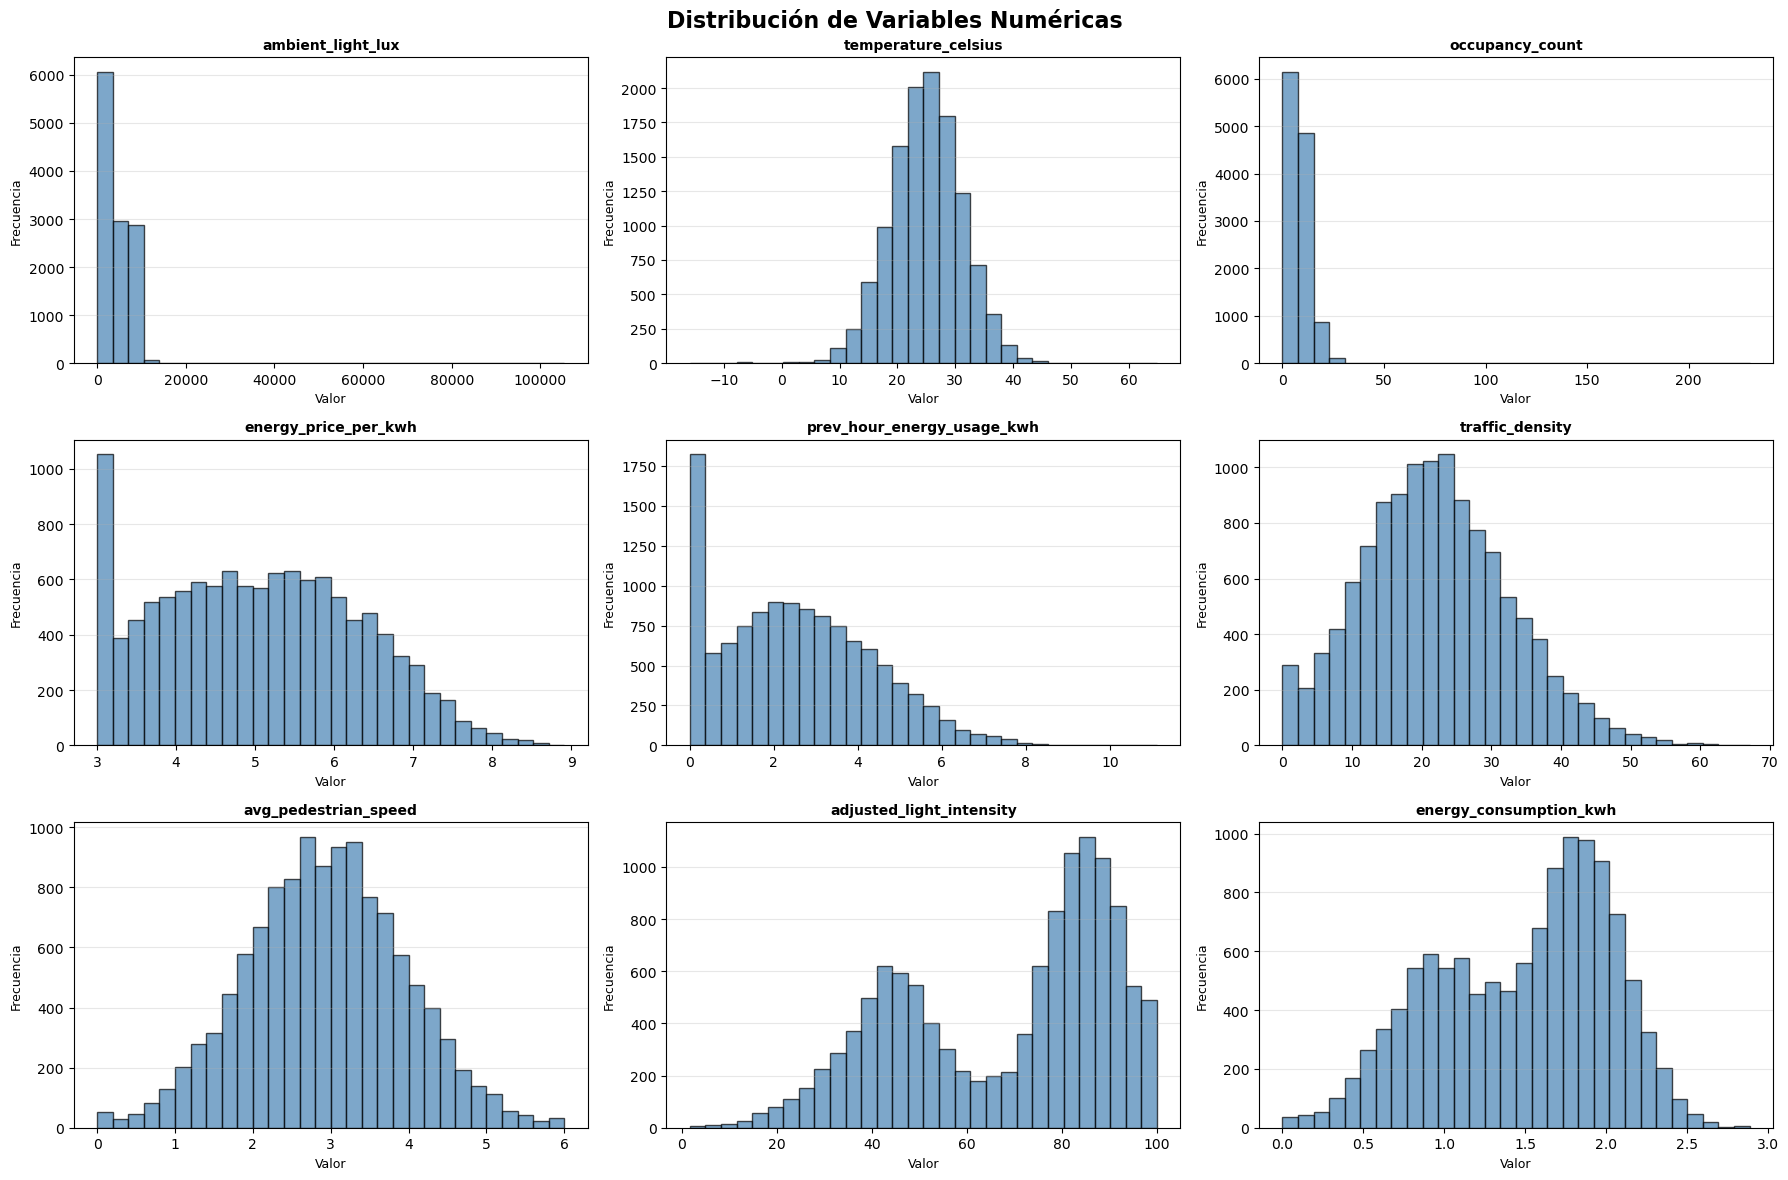

In [57]:
# Variables numéricas clave
key_numeric = ['ambient_light_lux', 'temperature_celsius', 'occupancy_count', 
               'energy_price_per_kwh', 'prev_hour_energy_usage_kwh', 
               'traffic_density', 'avg_pedestrian_speed', 
               'adjusted_light_intensity', 'energy_consumption_kwh']

# Crear histogramas
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Distribución de Variables Numéricas', fontsize=16, fontweight='bold')
axes = axes.ravel()

for idx, col in enumerate(key_numeric):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_title(col, fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Valor', fontsize=9)
    axes[idx].set_ylabel('Frecuencia', fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 7.2 Gráficos de cajas (Boxplots)

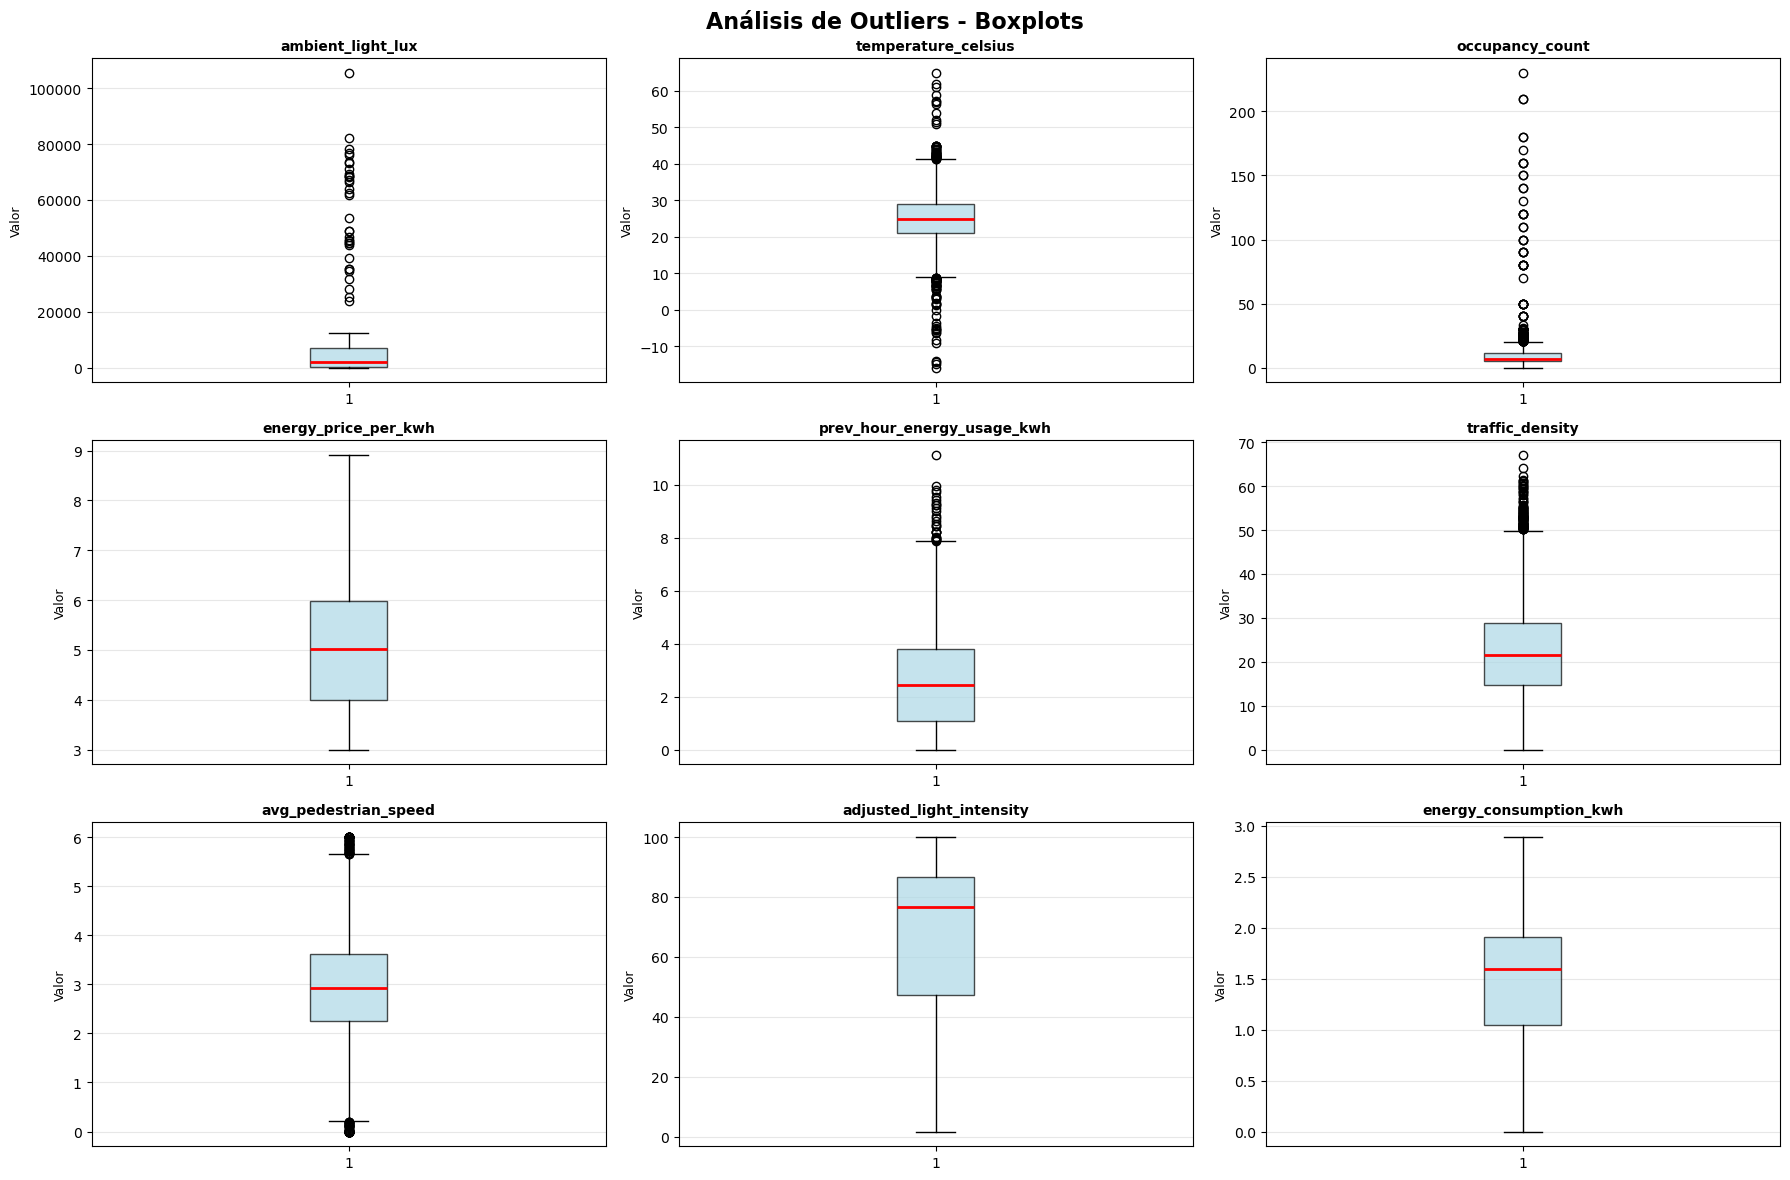

In [58]:
# Boxplots para detectar outliers
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Análisis de Outliers - Boxplots', fontsize=16, fontweight='bold')
axes = axes.ravel()

for idx, col in enumerate(key_numeric):
    axes[idx].boxplot(df[col], vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', alpha=0.7),
                     medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(col, fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Valor', fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

outliers ambient light ocupancy 
en vez de removerlo con intercuartilicos
winsorizing tratamiento de outliers, es tecnica jala todos los outliers al valor máximo que tiene 
ver cuantos outliers
ver dispersión eliminarlas, si son muy correlacionadas eliminarlas

### 7.3 Gráficos de densidad (KDE)

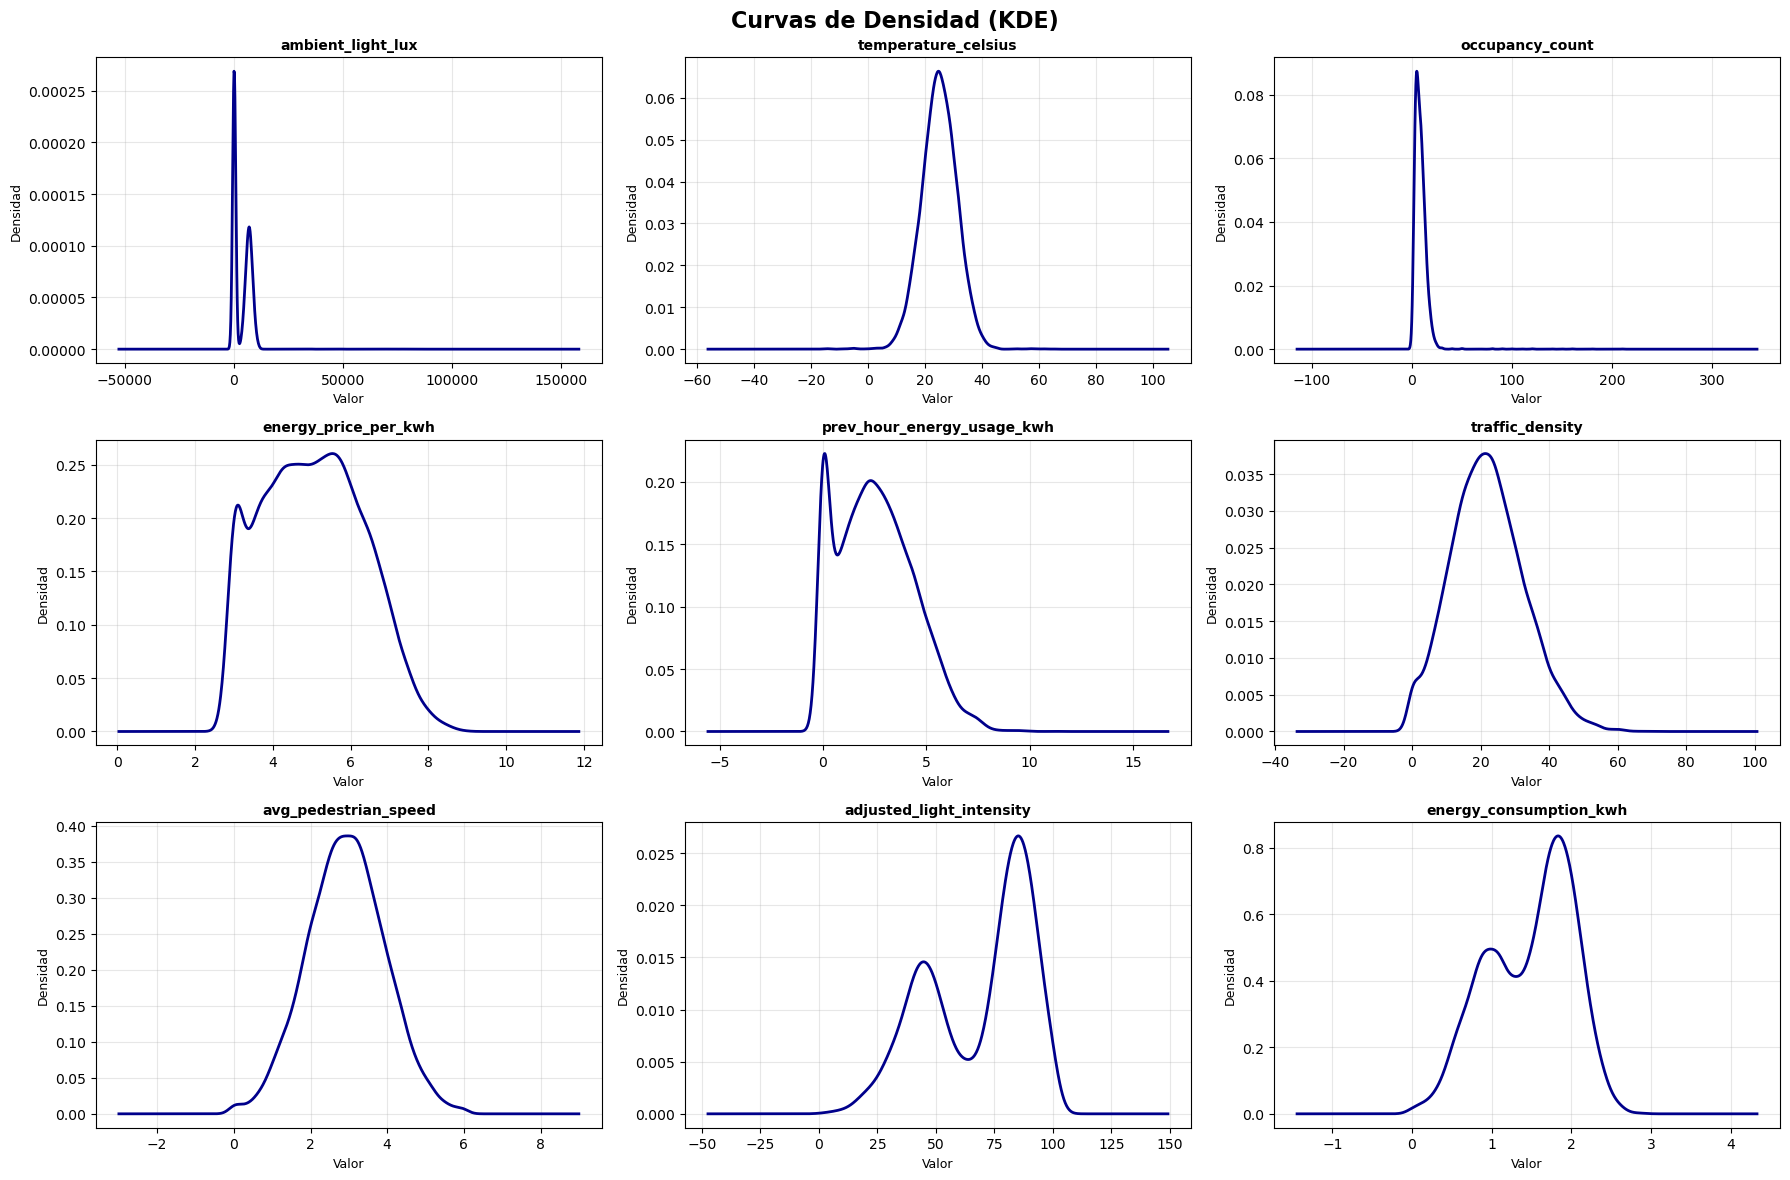

In [25]:
# KDE plots
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Curvas de Densidad (KDE)', fontsize=16, fontweight='bold')
axes = axes.ravel()

for idx, col in enumerate(key_numeric):
    df[col].plot(kind='kde', ax=axes[idx], color='darkblue', linewidth=2)
    axes[idx].set_title(col, fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Valor', fontsize=9)
    axes[idx].set_ylabel('Densidad', fontsize=9)
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 7.4 Gráficos de barras para variables categóricas

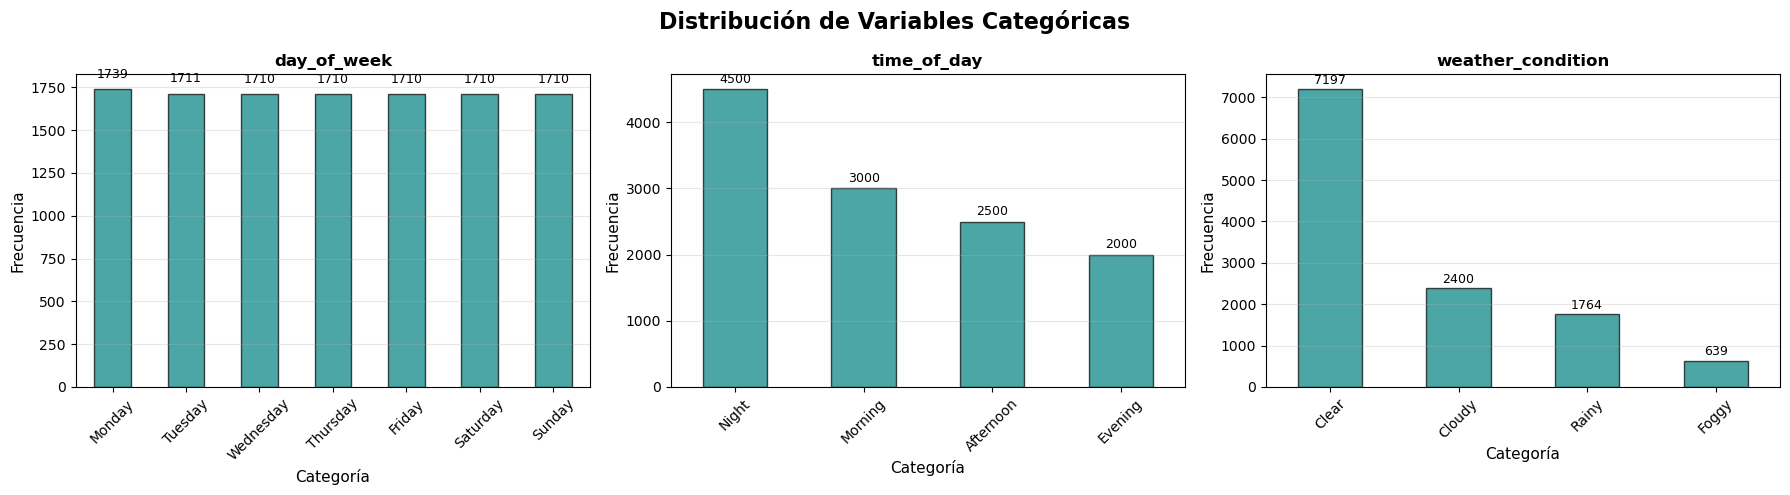

In [27]:
# Gráficos de barras para categóricas
cat_vars = ['day_of_week', 'time_of_day', 'weather_condition']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribución de Variables Categóricas', fontsize=16, fontweight='bold')

for idx, col in enumerate(cat_vars):
    counts = df[col].value_counts()
    counts.plot(kind='bar', ax=axes[idx], color='teal', alpha=0.7, edgecolor='black')
    axes[idx].set_title(col, fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Categoría', fontsize=11)
    axes[idx].set_ylabel('Frecuencia', fontsize=11)
    axes[idx].grid(axis='y', alpha=0.3)
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Agregar valores
    for i, v in enumerate(counts.values):
        axes[idx].text(i, v + 50, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### 7.5 Variables binarias

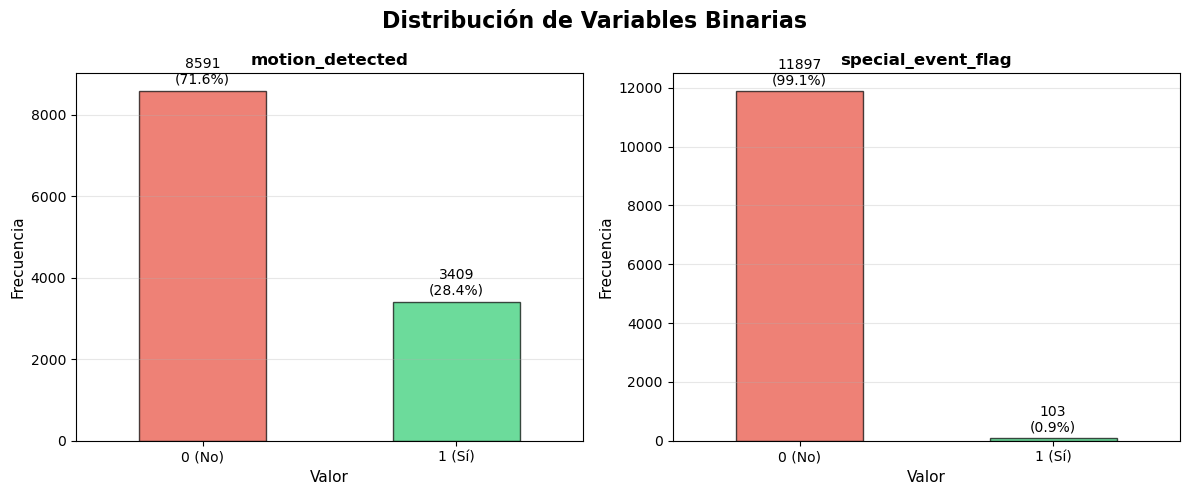

In [28]:
# Analizar variables binarias
binary_vars = ['motion_detected', 'special_event_flag']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Distribución de Variables Binarias', fontsize=16, fontweight='bold')

for idx, col in enumerate(binary_vars):
    counts = df[col].value_counts().sort_index()
    counts.plot(kind='bar', ax=axes[idx], color=['#e74c3c', '#2ecc71'], alpha=0.7, edgecolor='black')
    axes[idx].set_title(col, fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Valor', fontsize=11)
    axes[idx].set_ylabel('Frecuencia', fontsize=11)
    axes[idx].set_xticklabels(['0 (No)', '1 (Sí)'], rotation=0)
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Agregar valores y porcentajes
    total = counts.sum()
    for i, v in enumerate(counts.values):
        pct = (v/total)*100
        axes[idx].text(i, v + 100, f"{v}\n({pct:.1f}%)", ha='center', va='bottom')

plt.tight_layout()
plt.show()

special event flag en cuerda floja, esperar


## 8. Análisis Temporal

### 8.1 Tendencias temporales

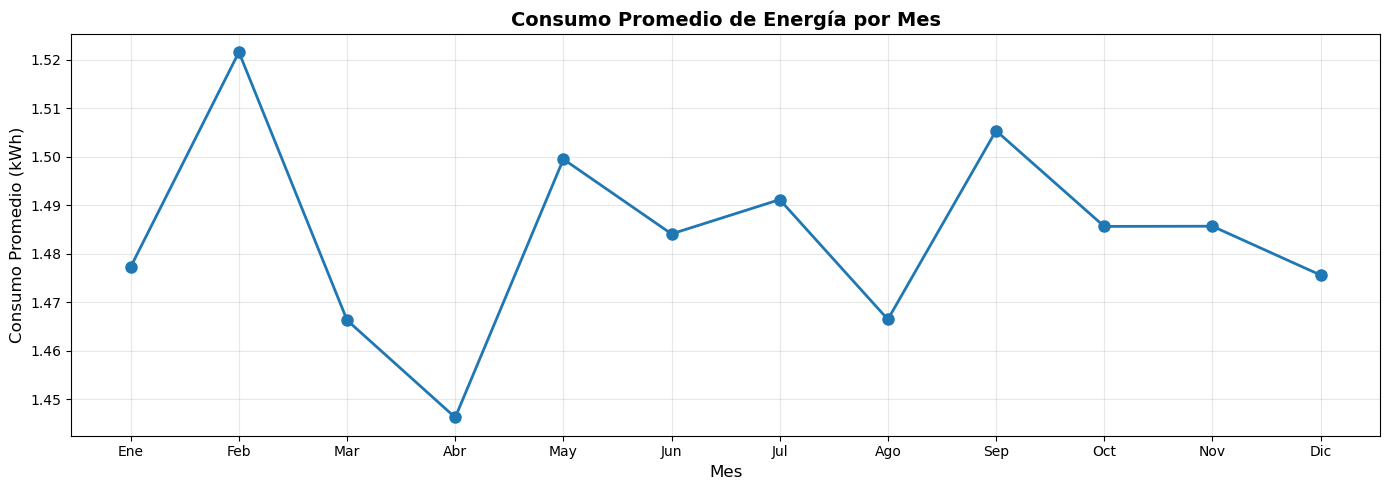

In [29]:
# Extraer features temporales
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek

# Consumo promedio por mes
monthly_consumption = df.groupby('month')['energy_consumption_kwh'].mean()

plt.figure(figsize=(14, 5))
plt.plot(monthly_consumption.index, monthly_consumption.values, marker='o', linewidth=2, markersize=8)
plt.title('Consumo Promedio de Energía por Mes', fontsize=14, fontweight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Consumo Promedio (kWh)', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                          'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.tight_layout()
plt.show()

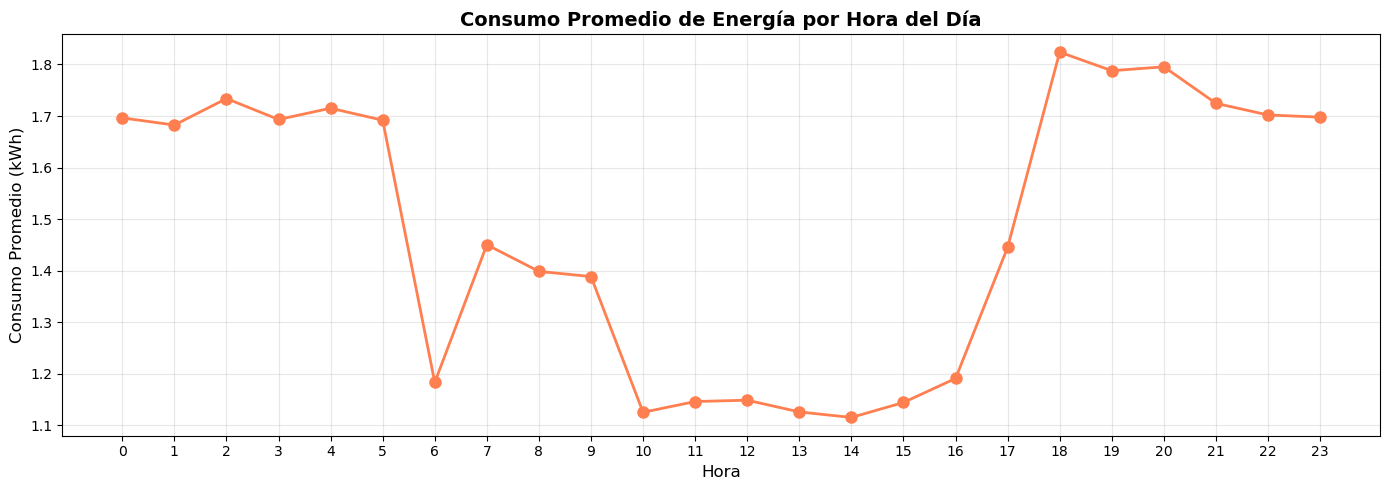

In [30]:
# Consumo promedio por hora del día
hourly_consumption = df.groupby('hour')['energy_consumption_kwh'].mean()

plt.figure(figsize=(14, 5))
plt.plot(hourly_consumption.index, hourly_consumption.values, marker='o', linewidth=2, markersize=8, color='coral')
plt.title('Consumo Promedio de Energía por Hora del Día', fontsize=14, fontweight='bold')
plt.xlabel('Hora', fontsize=12)
plt.ylabel('Consumo Promedio (kWh)', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

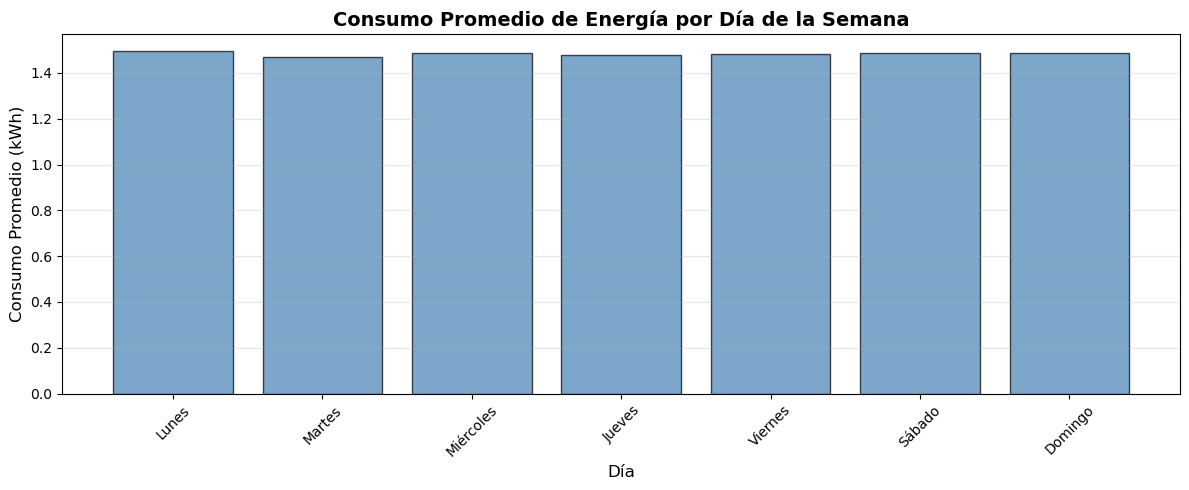

In [31]:
# Consumo por día de la semana
days_names = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
weekly_consumption = df.groupby('dayofweek')['energy_consumption_kwh'].mean()

plt.figure(figsize=(12, 5))
plt.bar(range(7), weekly_consumption.values, color='steelblue', alpha=0.7, edgecolor='black')
plt.title('Consumo Promedio de Energía por Día de la Semana', fontsize=14, fontweight='bold')
plt.xlabel('Día', fontsize=12)
plt.ylabel('Consumo Promedio (kWh)', fontsize=12)
plt.xticks(range(7), days_names, rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 8.2 Series temporales del consumo

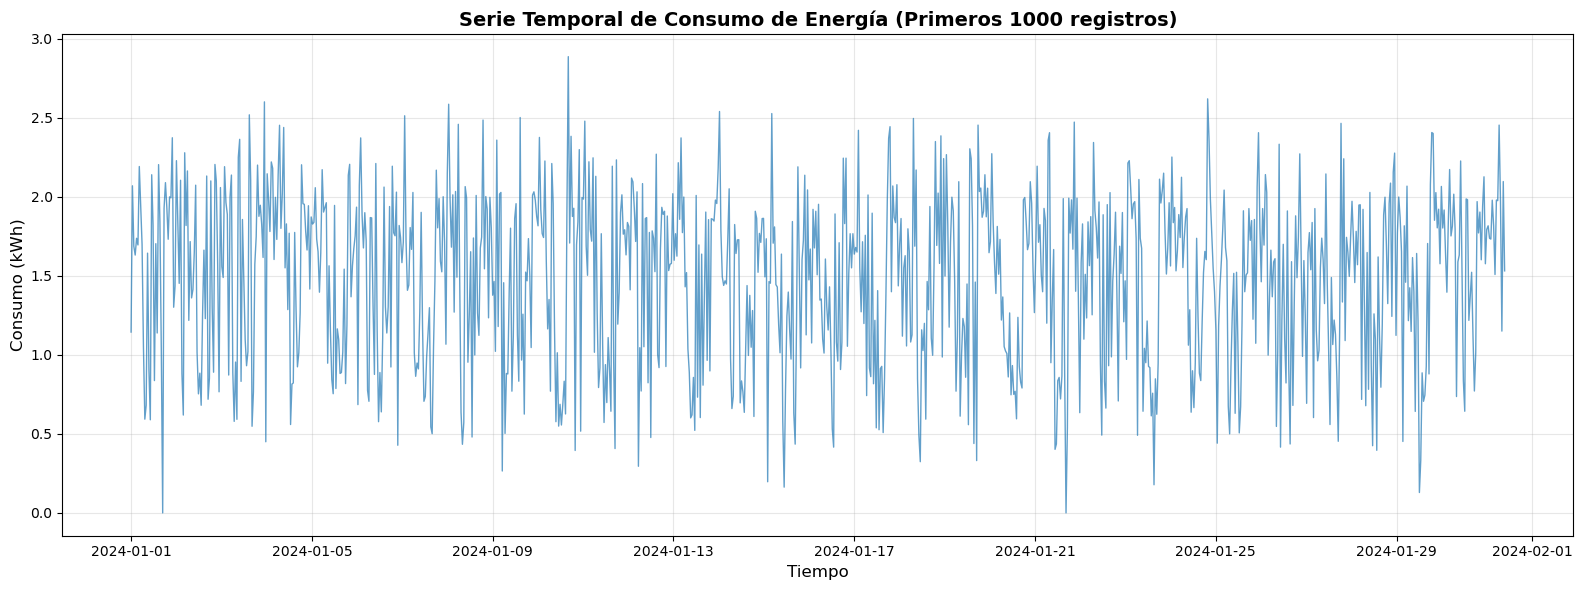

In [32]:
# Serie temporal completa (primeros 1000 registros)
plt.figure(figsize=(16, 6))
plt.plot(df['timestamp'][:1000], df['energy_consumption_kwh'][:1000], linewidth=1, alpha=0.7)
plt.title('Serie Temporal de Consumo de Energía (Primeros 1000 registros)', fontsize=14, fontweight='bold')
plt.xlabel('Tiempo', fontsize=12)
plt.ylabel('Consumo (kWh)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

utilizar otro tipo de algoritmos basados en redes neuronales
una red neuronal que predizca años siguientes en consumo

investigar articulos que hayan usado estos datasets

## 9. Análisis Multivariable

### 9.1 Matriz de correlación

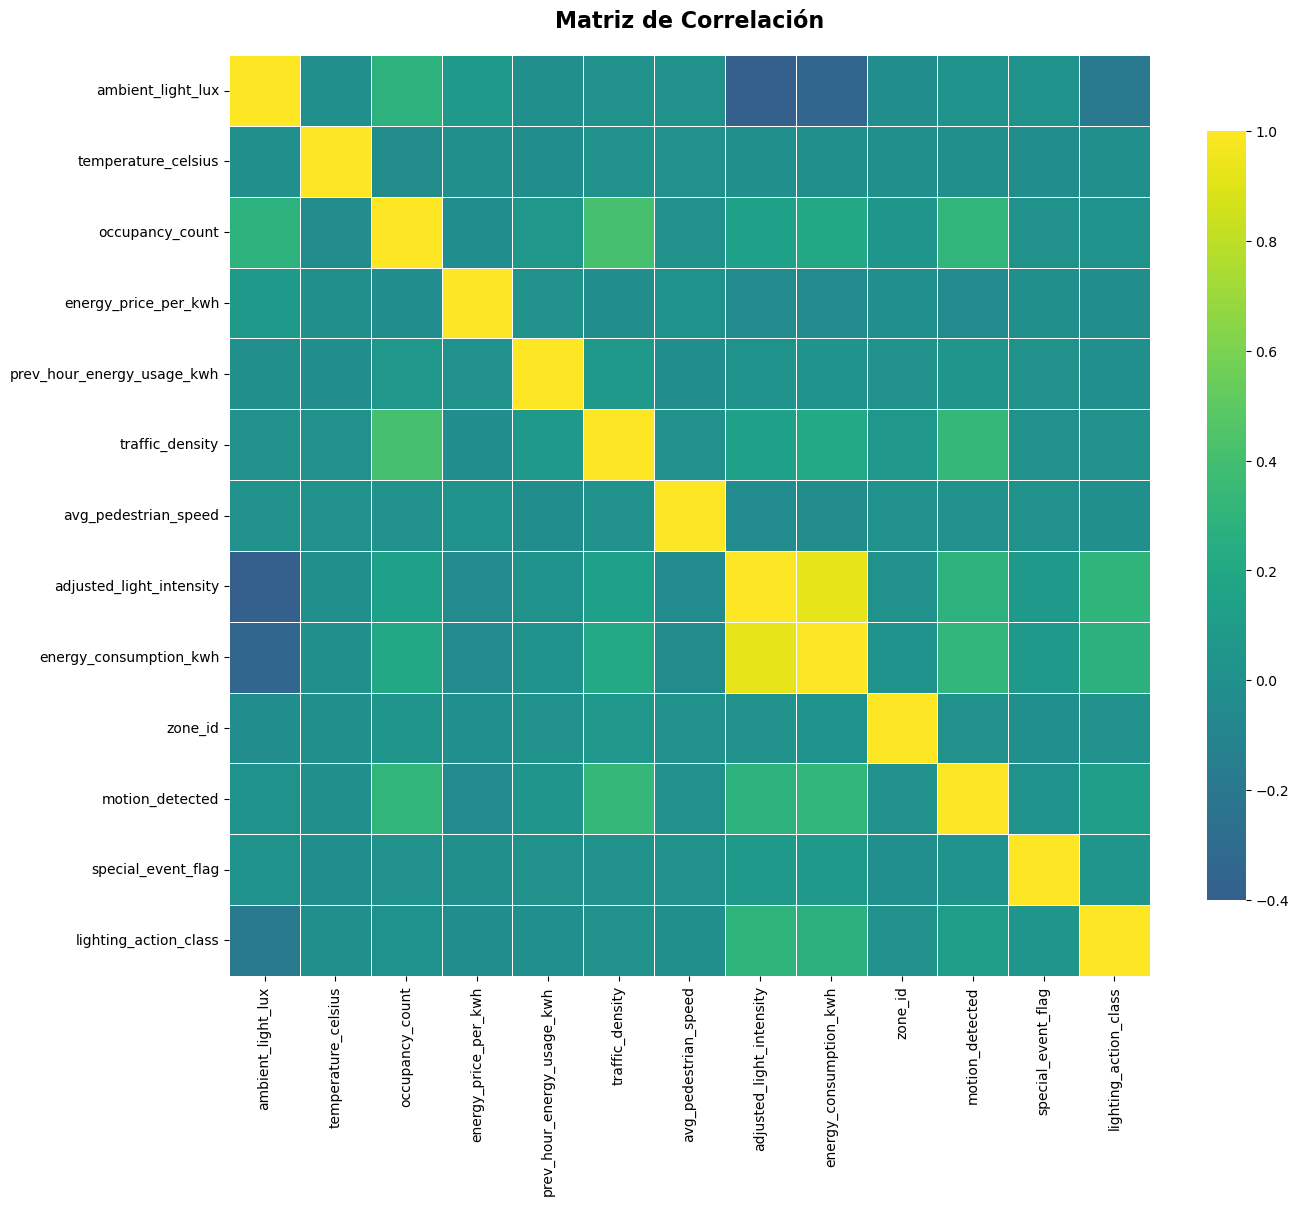

In [33]:
# Calcular matriz de correlación
numeric_cols_for_corr = key_numeric + ['zone_id', 'motion_detected', 'special_event_flag', 'lighting_action_class']
correlation_matrix = df[numeric_cols_for_corr].corr()

# Visualizar matriz de correlación
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, fmt='.2f', cmap='viridis', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

Correlaciones con energy_consumption_kwh (ordenadas):
energy_consumption_kwh        1.000000
adjusted_light_intensity      0.918882
motion_detected               0.318520
lighting_action_class         0.279818
traffic_density               0.208172
occupancy_count               0.197646
special_event_flag            0.073838
prev_hour_energy_usage_kwh    0.028266
zone_id                       0.015569
temperature_celsius          -0.004203
avg_pedestrian_speed         -0.038512
energy_price_per_kwh         -0.043773
ambient_light_lux            -0.349449
Name: energy_consumption_kwh, dtype: float64


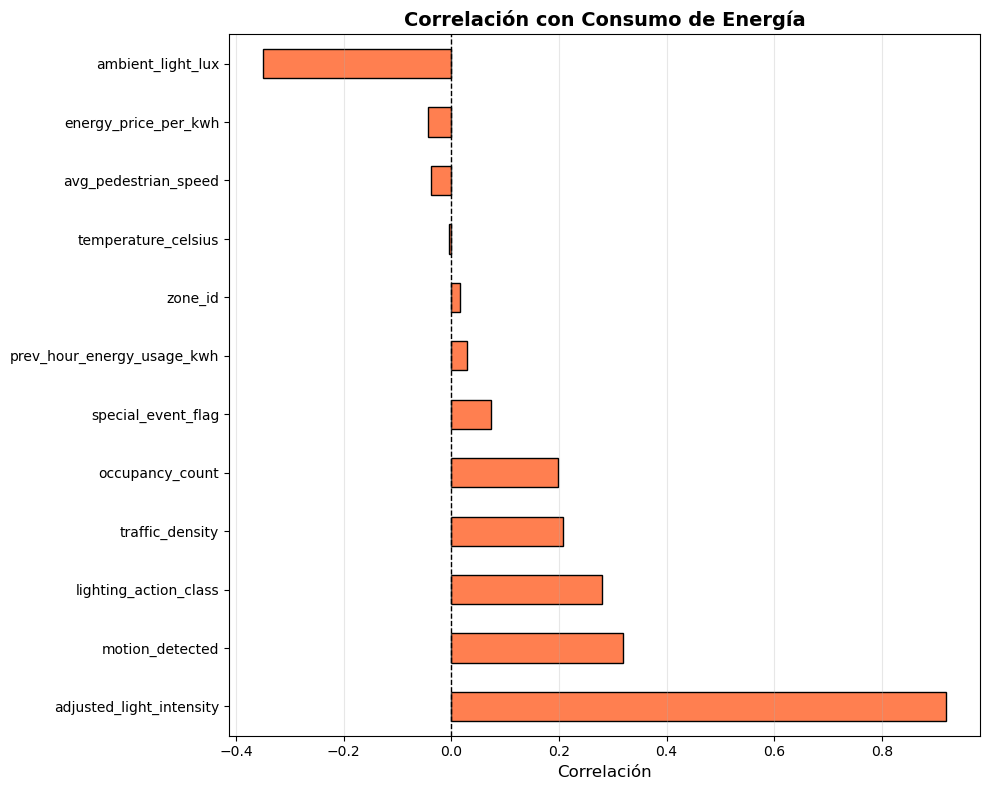

In [ ]:
# Correlaciones más fuertes con energy_consumption_kwh
print("Correlaciones con energy_consumption_kwh (ordenadas):")
energy_corr = correlation_matrix['energy_consumption_kwh'].sort_values(ascending=False)
print(energy_corr)

# Visualizar
plt.figure(figsize=(10, 8))
energy_corr.drop('energy_consumption_kwh').plot(kind='barh', color='coral', edgecolor='black')
plt.title('Correlación con Consumo de Energía', fontsize=14, fontweight='bold')
plt.xlabel('Correlación', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

#adjusted_light_intensity está muy correlacionada es muy importante

### 9.2 Diagramas de dispersión

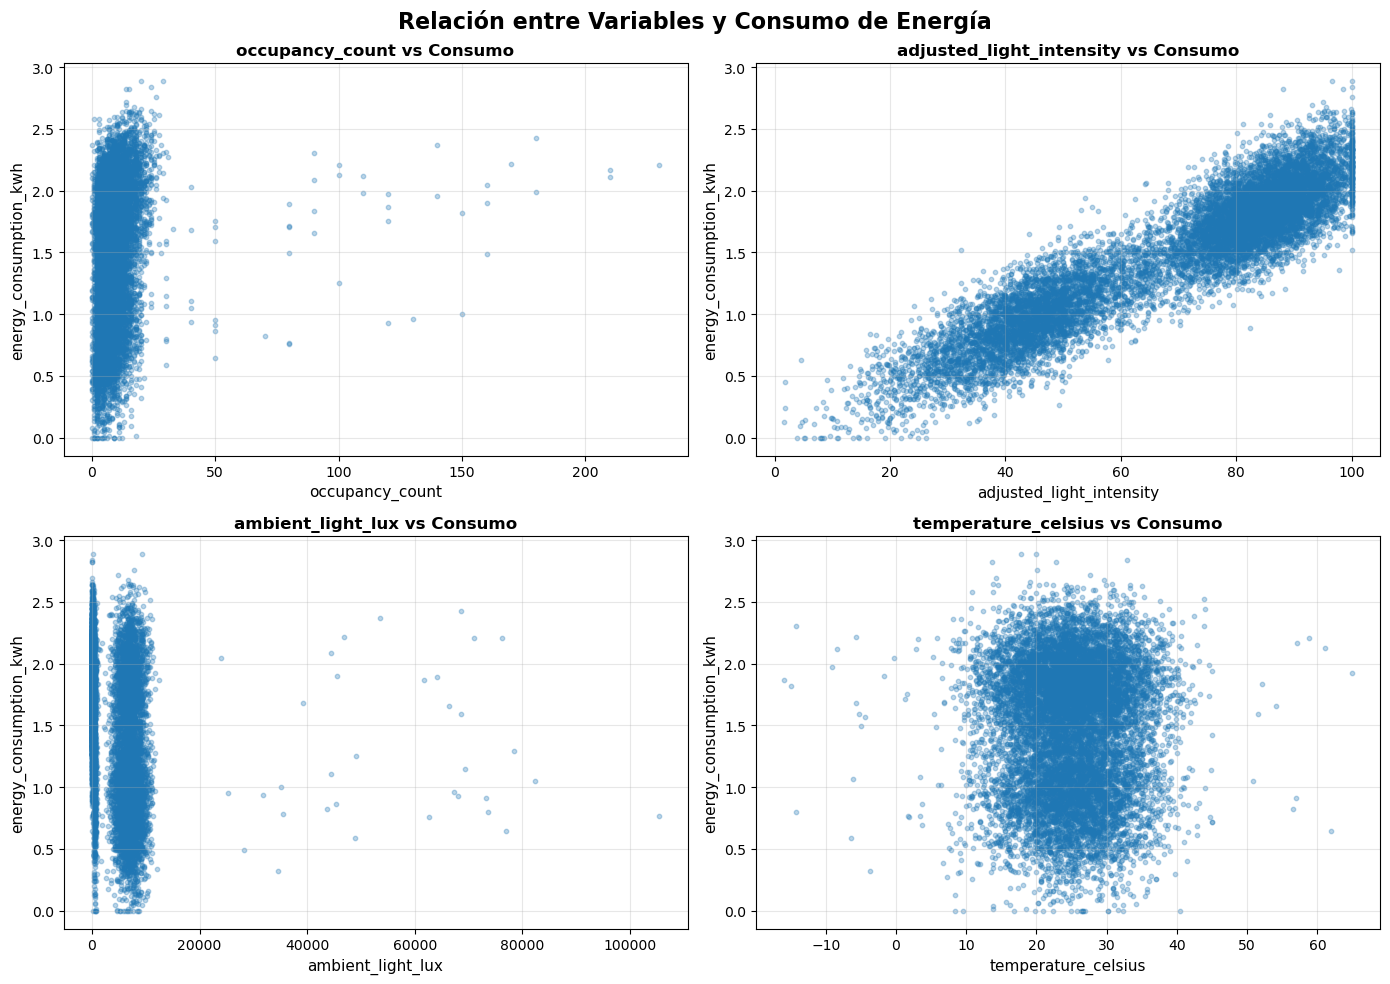

In [35]:
# Scatter plots de variables más correlacionadas con consumo
top_corr_vars = ['occupancy_count', 'adjusted_light_intensity', 'ambient_light_lux', 'temperature_celsius']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Relación entre Variables y Consumo de Energía', fontsize=16, fontweight='bold')
axes = axes.ravel()

for idx, var in enumerate(top_corr_vars):
    axes[idx].scatter(df[var], df['energy_consumption_kwh'], alpha=0.3, s=10)
    axes[idx].set_xlabel(var, fontsize=11)
    axes[idx].set_ylabel('energy_consumption_kwh', fontsize=11)
    axes[idx].set_title(f'{var} vs Consumo', fontsize=12, fontweight='bold')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 9.3 Pairplot de variables seleccionadas

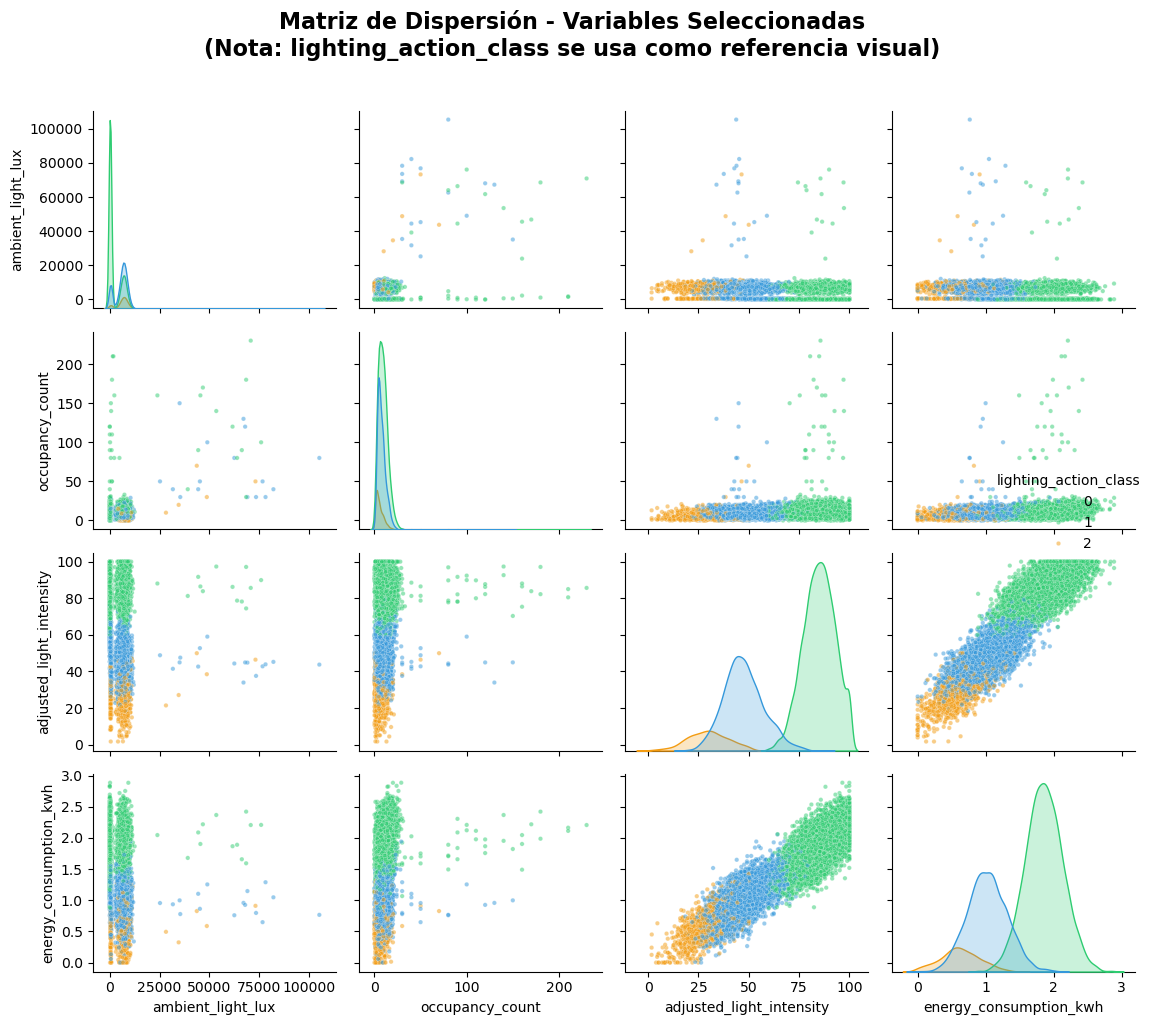

In [36]:
# Pairplot con subset de variables (usando lighting_action_class como hue para análisis)
subset_vars = ['ambient_light_lux', 'occupancy_count', 'adjusted_light_intensity', 
               'energy_consumption_kwh', 'lighting_action_class']

sns.pairplot(df[subset_vars], hue='lighting_action_class', 
             palette={0: '#3498db', 1: '#2ecc71', 2: '#f39c12'},
             diag_kind='kde', plot_kws={'alpha': 0.5, 's': 10})
plt.suptitle('Matriz de Dispersión - Variables Seleccionadas\n(Nota: lighting_action_class se usa como referencia visual)', 
             y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 10. Análisis por Clases

**Nota:** Aunque `lighting_action_class` no es nuestra variable objetivo, es útil analizar cómo se distribuye el consumo energético según esta variable categórica.

C:\Users\karen\AppData\Local\Temp\ipykernel_18548\491032835.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot(data_by_class, labels=['Clase 0', 'Clase 1', 'Clase 2'], patch_artist=True)
C:\Users\karen\AppData\Local\Temp\ipykernel_18548\491032835.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot(data_by_class, labels=['Clase 0', 'Clase 1', 'Clase 2'], patch_artist=True)
C:\Users\karen\AppData\Local\Temp\ipykernel_18548\491032835.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot(data_by_class, labels=['Clase 0', 'Clase 1', 'Clase 2'], patch_ar

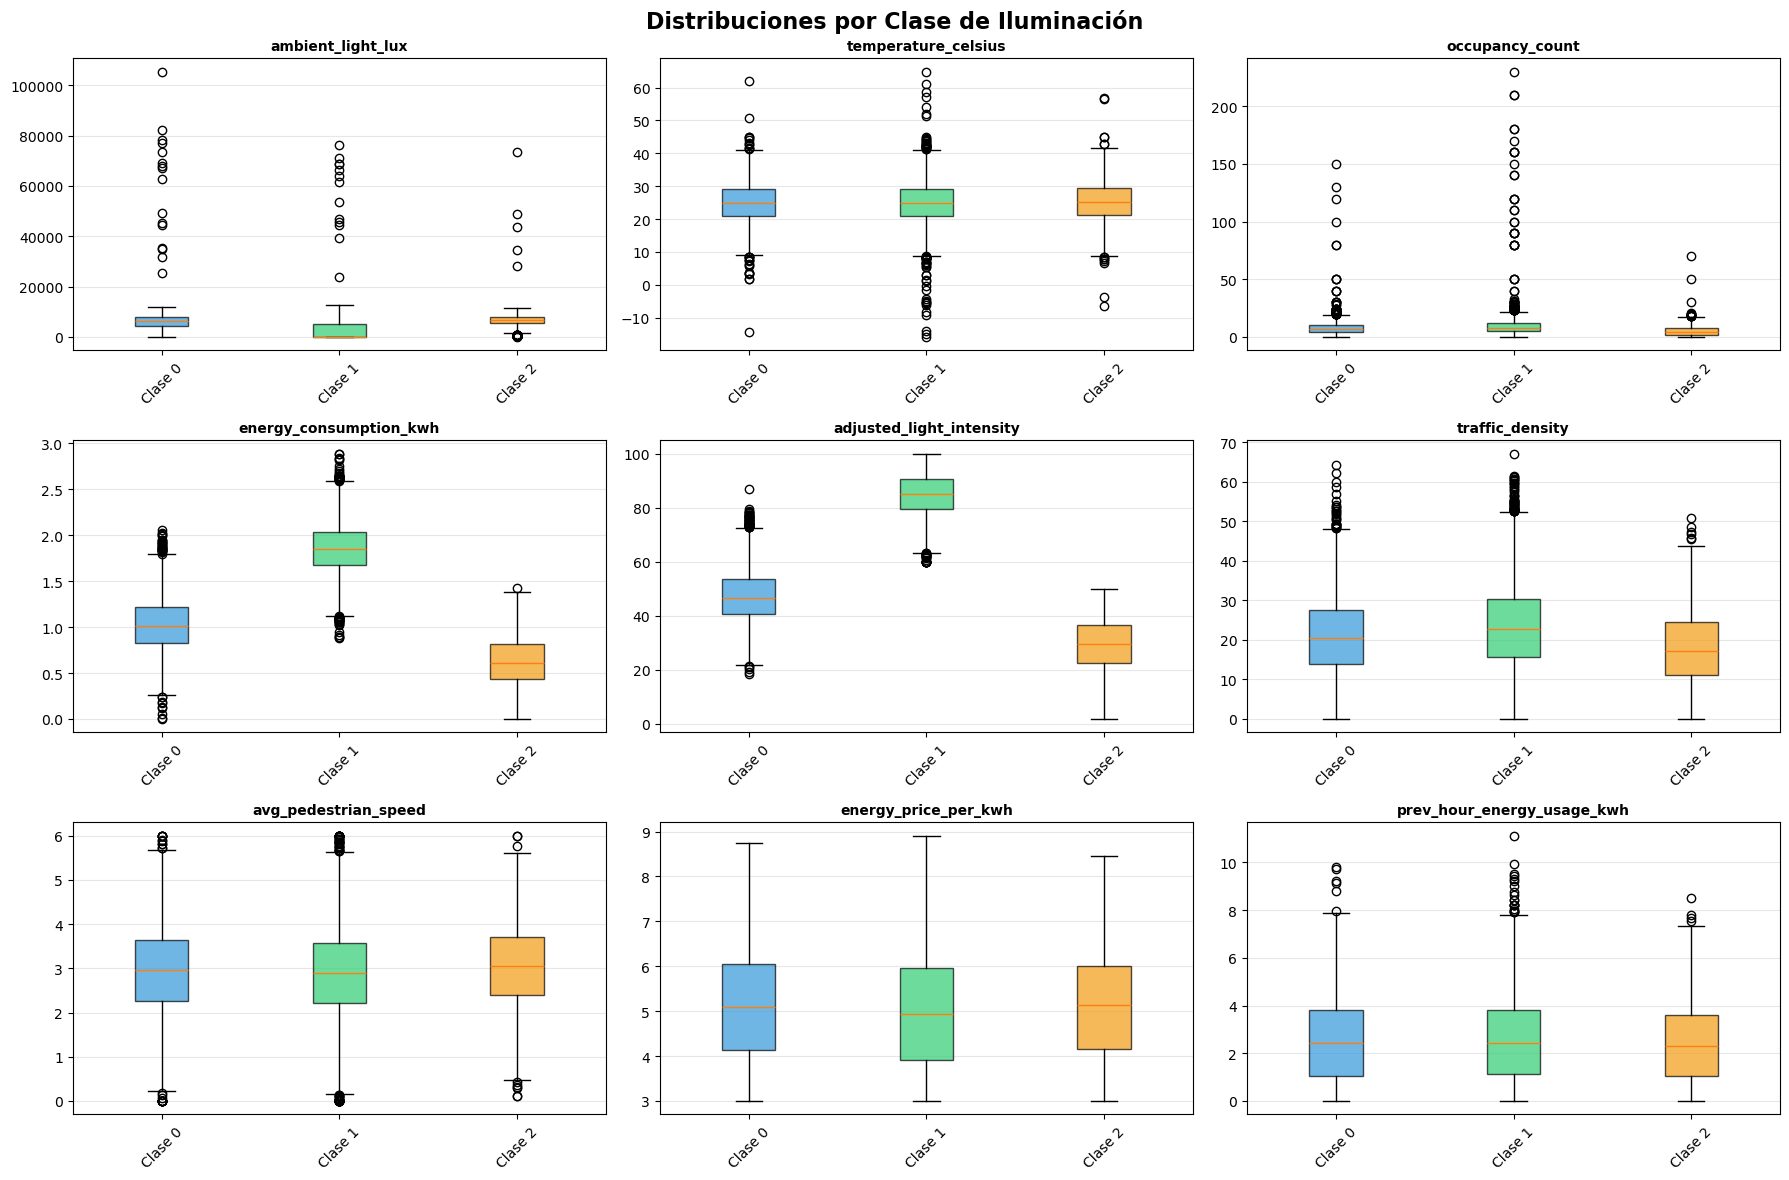

In [37]:
# Comparar distribuciones entre clases
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Distribuciones por Clase de Iluminación', fontsize=16, fontweight='bold')
axes = axes.ravel()

comparison_vars = ['ambient_light_lux', 'temperature_celsius', 'occupancy_count',
                   'energy_consumption_kwh', 'adjusted_light_intensity', 'traffic_density',
                   'avg_pedestrian_speed', 'energy_price_per_kwh', 'prev_hour_energy_usage_kwh']

for idx, var in enumerate(comparison_vars):
    data_by_class = [df[df['lighting_action_class'] == i][var].dropna() for i in range(3)]
    
    bp = axes[idx].boxplot(data_by_class, labels=['Clase 0', 'Clase 1', 'Clase 2'], patch_artist=True)
    
    # Colorear
    colors = ['#3498db', '#2ecc71', '#f39c12']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[idx].set_title(var, fontsize=10, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [50]:
# Estadísticas de Consumo de Energía por lighting_action_class
print("Estadísticas de energy_consumption_kwh por lighting_action_class:")

print("\n(lighting_action_class es una variable auxiliar, NO es nuestro objetivo)\n")
for clase in sorted(df['lighting_action_class'].unique()):
    clase_data = df[df['lighting_action_class'] == clase]['energy_consumption_kwh']
    print(f"\nClase {clase}: ({len(clase_data)} registros)")
    print(f"  - Media: {clase_data.mean():.3f} kWh")
    print(f"  - Mediana: {clase_data.median():.3f} kWh")
    print(f"  - Desv. Est.: {clase_data.std():.3f} kWh")
    print(f"  - Min: {clase_data.min():.3f} kWh")
    print(f"  - Max: {clase_data.max():.3f} kWh")

Estadísticas de energy_consumption_kwh por lighting_action_class:

(lighting_action_class es una variable auxiliar, NO es nuestro objetivo)


Clase 0: (3992 registros)
  - Media: 1.021 kWh
  - Mediana: 1.014 kWh
  - Desv. Est.: 0.293 kWh
  - Min: 0.000 kWh
  - Max: 2.056 kWh

Clase 1: (7093 registros)
  - Media: 1.855 kWh
  - Mediana: 1.852 kWh
  - Desv. Est.: 0.277 kWh
  - Min: 0.879 kWh
  - Max: 2.887 kWh

Clase 2: (915 registros)
  - Media: 0.622 kWh
  - Mediana: 0.614 kWh
  - Desv. Est.: 0.287 kWh
  - Min: 0.000 kWh
  - Max: 1.422 kWh


## 11. Análisis de Zonas

In [49]:
# Análisis por zona
print(f"Número total de zonas: {df['zone_id'].nunique()}")
print(f"\nDistribución de registros por zona:")
print(df['zone_id'].value_counts().sort_index())

Número total de zonas: 12

Distribución de registros por zona:
zone_id
1     1018
2      971
3     1009
4      995
5     1014
6      942
7      996
8      979
9     1001
10     993
11    1005
12    1077
Name: count, dtype: int64


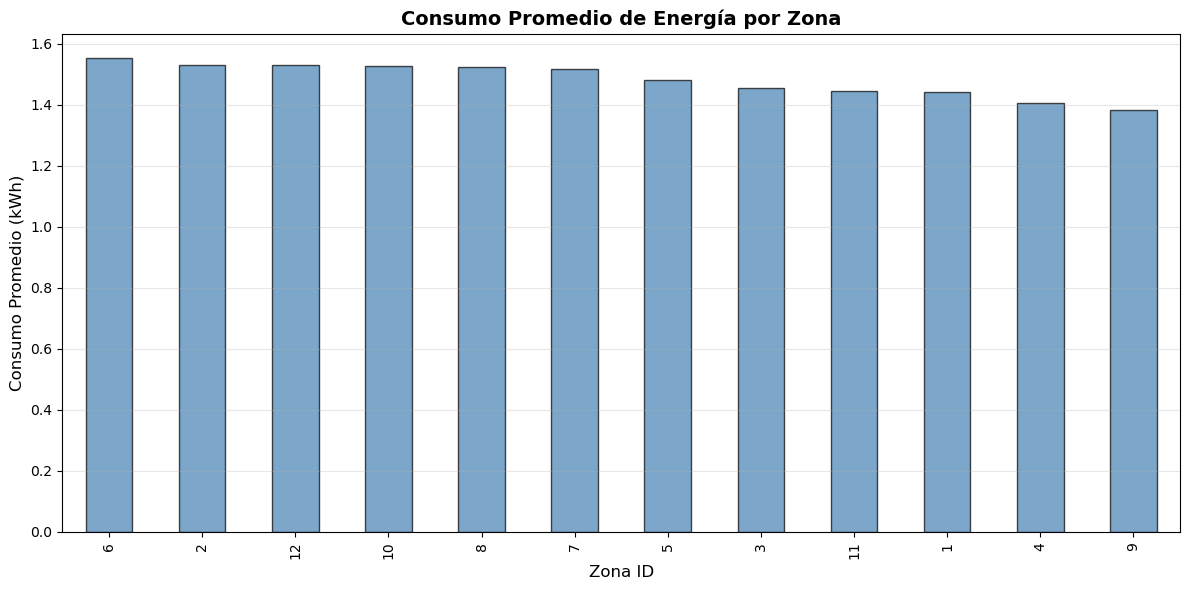

In [48]:
# Consumo promedio por zona
zone_consumption = df.groupby('zone_id')['energy_consumption_kwh'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
zone_consumption.plot(kind='bar', color='steelblue', alpha=0.7, edgecolor='black')
plt.title('Consumo Promedio de Energía por Zona', fontsize=14, fontweight='bold')
plt.xlabel('Zona ID', fontsize=12)
plt.ylabel('Consumo Promedio (kWh)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 12. Detección de Valores Duplicados y Outliers

In [47]:
# Verificar duplicados
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

if duplicados > 0:
    print(f"\nPorcentaje de duplicados: {(duplicados/len(df))*100:.2f}%")
else:
    print("\nNo hay filas duplicadas")

Número de filas duplicadas: 0

No hay filas duplicadas


In [45]:
# Detectar outliers usando IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("Detección de Outliers (método IQR):")

outlier_summary = []
for col in key_numeric:
    n_outliers, lower, upper = detect_outliers_iqr(df, col)
    pct_outliers = (n_outliers / len(df)) * 100
    outlier_summary.append({
        'Columna': col,
        'N_Outliers': n_outliers,
        'Porcentaje': f"{pct_outliers:.2f}%",
        'Límite_Inferior': f"{lower:.2f}",
        'Límite_Superior': f"{upper:.2f}"
    })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df

Detección de Outliers (método IQR):


,Columna,N_Outliers,Porcentaje,Límite_Inferior,Límite_Superior
0,ambient_light_lux,34,0.28%,-10378.78,17446.13
1,temperature_celsius,112,0.93%,8.80,41.25
2,occupancy_count,245,2.04%,-4.00,20.00
3,energy_price_per_kwh,0,0.00%,1.01,8.98
4,prev_hour_energy_usage_kwh,28,0.23%,-2.97,7.86
5,traffic_density,98,0.82%,-6.70,50.10
6,avg_pedestrian_speed,103,0.86%,0.21,5.65
7,adjusted_light_intensity,0,0.00%,-11.61,145.61
8,energy_consumption_kwh,0,0.00%,-0.24,3.20


## 13. Resumen y Conclusiones del EDA

In [44]:

print("RESUMEN DEL ANÁLISIS EXPLORATORIO")

print(f"\n1. DIMENSIONES:")
print(f"   - Filas: {df.shape[0]:,}")
print(f"   - Columnas: {df.shape[1]}")

print(f"\n2. PERIODO TEMPORAL:")
print(f"   - Fecha inicial: {df['timestamp'].min()}")
print(f"   - Fecha final: {df['timestamp'].max()}")
print(f"   - Días cubiertos: {(df['timestamp'].max() - df['timestamp'].min()).days}")

print(f"\n3. VALORES FALTANTES:")
missing_total = df.isnull().sum().sum()
print(f"   - Total: {missing_total}")
if missing_total == 0:
    print("   - ¡Dataset completamente limpio!")

print(f"\n4. DUPLICADOS:")
print(f"   - Filas duplicadas: {df.duplicated().sum()}")

print(f"\n5. VARIABLE OBJETIVO (energy_consumption_kwh):")
print(f"   - Tipo: Variable continua (regresión)")
print(f"   - Media: {df['energy_consumption_kwh'].mean():.3f} kWh")
print(f"   - Mediana: {df['energy_consumption_kwh'].median():.3f} kWh")
print(f"   - Desv. Estándar: {df['energy_consumption_kwh'].std():.3f} kWh")
print(f"   - Rango: [{df['energy_consumption_kwh'].min():.3f}, {df['energy_consumption_kwh'].max():.3f}] kWh")
print(f"   - Asimetría: {df['energy_consumption_kwh'].skew():.3f}")

print(f"\n6. VARIABLES CLAVE:")
print(f"   - Zonas: {df['zone_id'].nunique()}")
print(f"   - Condiciones climáticas: {df['weather_condition'].nunique()}")
print(f"   - Momentos del día: {df['time_of_day'].nunique()}")

print(f"\n7. CORRELACIONES FUERTES CON CONSUMO (energy_consumption_kwh):")
# Recalcular correlaciones
numeric_cols_temp = ['ambient_light_lux', 'temperature_celsius', 'occupancy_count',
                     'energy_price_per_kwh', 'prev_hour_energy_usage_kwh', 'traffic_density',
                     'avg_pedestrian_speed', 'adjusted_light_intensity', 'energy_consumption_kwh']
corr_with_target = df[numeric_cols_temp].corr()['energy_consumption_kwh'].drop('energy_consumption_kwh')
strong_corr = corr_with_target[abs(corr_with_target) > 0.3].sort_values(ascending=False)
for var, corr_val in strong_corr.items():
    print(f"   - {var}: {corr_val:.3f}")


RESUMEN DEL ANÁLISIS EXPLORATORIO

1. DIMENSIONES:
   - Filas: 12,000
   - Columnas: 22

2. PERIODO TEMPORAL:
   - Fecha inicial: 2024-01-01 00:00:00
   - Fecha final: 2024-12-31 00:00:00
   - Días cubiertos: 365

3. VALORES FALTANTES:
   - Total: 0
   - ¡Dataset completamente limpio!

4. DUPLICADOS:
   - Filas duplicadas: 0

5. VARIABLE OBJETIVO (energy_consumption_kwh):
   - Tipo: Variable continua (regresión)
   - Media: 1.484 kWh
   - Mediana: 1.595 kWh
   - Desv. Estándar: 0.538 kWh
   - Rango: [0.000, 2.887] kWh
   - Asimetría: -0.355

6. VARIABLES CLAVE:
   - Zonas: 12
   - Condiciones climáticas: 4
   - Momentos del día: 4

7. CORRELACIONES FUERTES CON CONSUMO (energy_consumption_kwh):
   - adjusted_light_intensity: 0.919
   - ambient_light_lux: -0.349


## 14. Próximos Pasos

**Tareas pendientes para el preprocesamiento:**

1. **Feature Engineering:**
   - Extraer más features temporales (estación del año, fin de semana vs día laboral)
   - Crear interacciones entre variables
   - Agregar features de lag (valores anteriores)

2. **Codificar variables categóricas:**
   - `day_of_week`: Label Encoding u Ordinal
   - `time_of_day`: Ordinal Encoding
   - `weather_condition`: One-Hot Encoding

3. **Normalización/Escalado:**
   - StandardScaler o MinMaxScaler
   - Aplicar después de train/test split

4. **Balanceo de clases:**
   - SMOTE para sobremuestrear clase minoritaria (Clase 2)
   - O usar pesos de clase en el modelo

5. **Manejo de outliers:**
   - Evaluar si conservar o transformar
   - Considerar técnicas robustas

6. **Análisis de multicolinealidad:**
   - Evaluar VIF (Variance Inflation Factor)
   - Considerar eliminación de variables redundantes

7. **Preparación para modelos:**
   - Split train/validation/test
   - Cross-validation strategy


**Fin del EDA - Dataset Smart Lighting**